In [9]:
## dBHI_RSA
## import packages

import os
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from nltools.data import Adjacency
from sklearn.metrics import pairwise_distances

%matplotlib inline

In [10]:
# read in data
mat_data = sio.loadmat('/brain-heart interplay/dBHI/dBHI_for_each.mat')
montage = ['Ftl', 'Ctl', 'Ptr']
dBHI_index = ['LF2a', 'HF2a', 'a2LF', 'a2HF', 'LF2b', 'HF2b', 'b2LF', 'b2HF', 'LF2d', 'HF2d', 'd2LF', 'd2HF', 'LF2g', 'HF2g', 'g2LF', 'g2HF', 'LF2t', 'HF2t', 't2LF', 't2HF']

info = pd.read_csv('/child_info.csv')

dBHI_Fe_Ne = mat_data['dBHI_Fe_Ne'][0, 0]
dBHI_ids = [dBHI_Fe_Ne['ID'][0, i][0][0] for i in range(dBHI_Fe_Ne['ID'].shape[1])]
# make sure the info is aligned with dBHI
info_dBHI = info[info['ID'].isin(dBHI_ids)].copy()
info_dBHI.reset_index(drop=True, inplace=True)

info_dBHI['A_Ha_Ne'] = info_dBHI['happy_A'] - info_dBHI['neutral_A']
info_dBHI['V_Ha_Ne'] = info_dBHI['happy_V'] - info_dBHI['neutral_V']
info_dBHI['A_Fe_Ne'] = info_dBHI['fear_A'] - info_dBHI['neutral_A']
info_dBHI['V_Fe_Ne'] = info_dBHI['fear_V'] - info_dBHI['neutral_V']

# Inter-subject similarity of self-reported feelings

## for all children

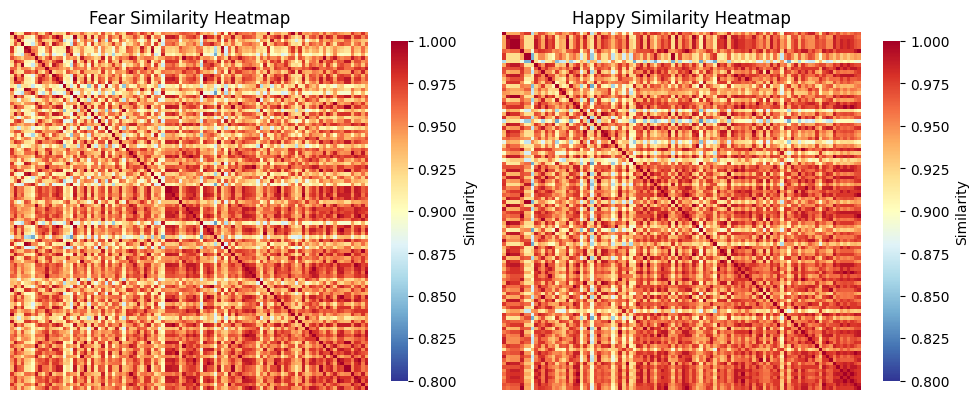

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sorted by age
info_dBHI = info_dBHI.sort_values(by='Age_month')

features_Fe = info_dBHI[['A_Fe_Ne', 'V_Fe_Ne']].values
features_Ha = info_dBHI[['A_Ha_Ne', 'V_Ha_Ne']].values
n_subs = len(info_dBHI)

full_nn_mtx_Fe = np.zeros((n_subs, n_subs))
full_nn_mtx_Ha = np.zeros((n_subs, n_subs))

# similarity matrix based on Euclidean distance
for i in range(n_subs):
    for j in range(i + 1, n_subs):
        dist_ij_Fe = 1 - (np.linalg.norm(features_Fe[i] - features_Fe[j]) / n_subs)
        dist_ij_Ha = 1 - (np.linalg.norm(features_Ha[i] - features_Ha[j]) / n_subs)
        full_nn_mtx_Fe[i, j] = dist_ij_Fe
        full_nn_mtx_Fe[j, i] = dist_ij_Fe
        full_nn_mtx_Ha[i, j] = dist_ij_Ha
        full_nn_mtx_Ha[j, i] = dist_ij_Ha

full_nn_mtx_Fe = (full_nn_mtx_Fe - np.min(full_nn_mtx_Fe)) / (np.max(full_nn_mtx_Fe) - np.min(full_nn_mtx_Fe))
full_nn_mtx_Ha = (full_nn_mtx_Ha - np.min(full_nn_mtx_Ha)) / (np.max(full_nn_mtx_Ha) - np.min(full_nn_mtx_Ha))

np.fill_diagonal(full_nn_mtx_Fe, 1)
np.fill_diagonal(full_nn_mtx_Ha, 1)

# plot similarity heatmap
fig, axes = plt.subplots(1, 2, figsize=(10, 10))  

# Fear 
sns.heatmap(full_nn_mtx_Fe, 
            ax=axes[0], 
            cmap='RdYlBu_r', 
            square=True, 
            cbar=True,
            vmin=0.8,  
            vmax=1.0,  
            cbar_kws={'label': 'Similarity', 'shrink': 0.35},
            xticklabels=[], 
            yticklabels=[])
axes[0].set_title('Fear Similarity Heatmap')

# Happy 
sns.heatmap(full_nn_mtx_Ha, 
            ax=axes[1], 
            cmap='RdYlBu_r', 
            square=True, 
            cbar=True,
            vmin=0.8,  
            vmax=1.0,  
            cbar_kws={'label': 'Similarity', 'shrink': 0.35},
            xticklabels=[], 
            yticklabels=[])
axes[1].set_title('Happy Similarity Heatmap')

plt.tight_layout()
plt.show()

## for each age group separately

In [12]:
## compute similarity matrix of self-reported feelings for each age group

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

age_groups = {
    'young': info_dBHI[info_dBHI['Age_month'] < 84], # 5-6 yrs
    'middle': info_dBHI[(info_dBHI['Age_month'] >= 84) & (info_dBHI['Age_month'] <= 108)], # 7-8 yrs
    'old': info_dBHI[info_dBHI['Age_month'] > 108] # 9-10 yrs
}

nn_mtx_Fe = {}
nn_mtx_Ha = {}

for group_name, group_data in age_groups.items():
    n_subs = len(group_data)  
    features_Fe = group_data[['A_Fe_Ne', 'V_Fe_Ne']].values
    features_Ha = group_data[['A_Ha_Ne', 'V_Ha_Ne']].values

    nn_mtx_Fe[group_name] = np.zeros((n_subs, n_subs))
    nn_mtx_Ha[group_name] = np.zeros((n_subs, n_subs))

    for i in range(n_subs):
        for j in range(i + 1, n_subs):
            dist_ij_Fe = 1 - (np.linalg.norm(features_Fe[i] - features_Fe[j]) / n_subs)  
            dist_ij_Ha = 1 - (np.linalg.norm(features_Ha[i] - features_Ha[j]) / n_subs)
            nn_mtx_Fe[group_name][i, j] = dist_ij_Fe
            nn_mtx_Fe[group_name][j, i] = dist_ij_Fe
            nn_mtx_Ha[group_name][i, j] = dist_ij_Ha
            nn_mtx_Ha[group_name][j, i] = dist_ij_Ha

    nn_mtx_Fe[group_name] = (nn_mtx_Fe[group_name] - np.min(nn_mtx_Fe[group_name])) / (np.max(nn_mtx_Fe[group_name]) - np.min(nn_mtx_Fe[group_name]))
    nn_mtx_Ha[group_name] = (nn_mtx_Ha[group_name] - np.min(nn_mtx_Ha[group_name])) / (np.max(nn_mtx_Ha[group_name]) - np.min(nn_mtx_Ha[group_name]))

    np.fill_diagonal(nn_mtx_Fe[group_name], 1)
    np.fill_diagonal(nn_mtx_Ha[group_name], 1)


===== Fear Similarity Results =====
Kruskal-Wallis H Statistic: 70.37852, P-value: 0.00000
 Comparison  U Statistic      P-value Bonferroni Corrected
 5-6 vs 7-8     759891.0 3.401063e-10                    *
5-6 vs 9-10     489021.0 7.774071e-15                    *
7-8 vs 9-10     496205.5 1.557223e-01                 n.s.

===== Happy Similarity Results =====
Kruskal-Wallis H Statistic: 95.97799, P-value: 0.00000
 Comparison  U Statistic      P-value Bonferroni Corrected
 5-6 vs 7-8     713251.0 6.076262e-18                    *
5-6 vs 9-10     489031.0 7.771896e-15                    *
7-8 vs 9-10     518668.5 7.894593e-01                 n.s.


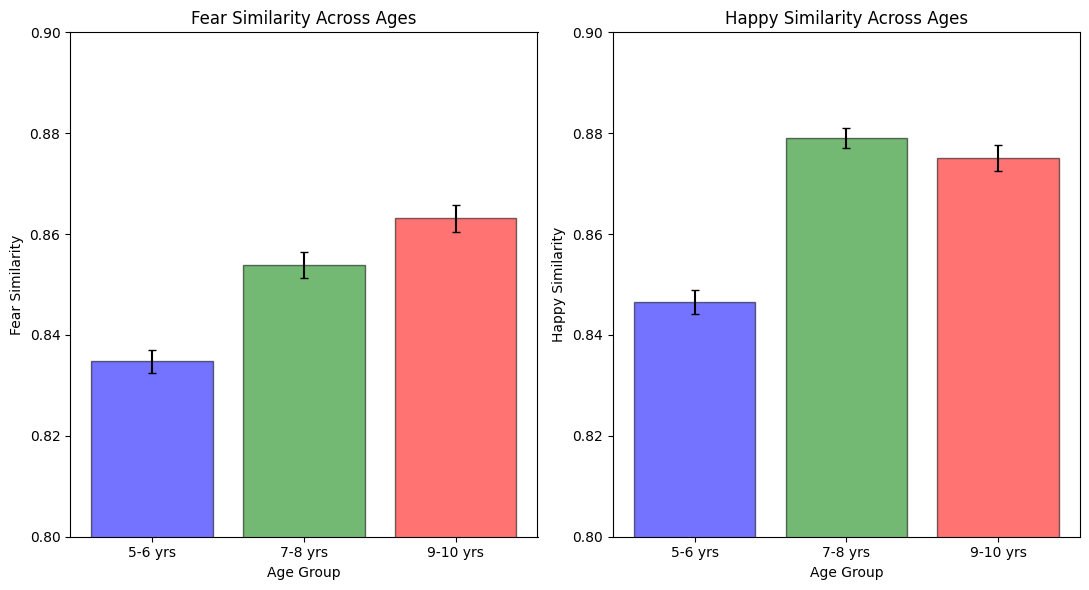

In [13]:
## examine the age differences of similarity 

from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from scipy.stats import sem  

similarity_group_5_6_Fe = nn_mtx_Fe['young'].flatten()
similarity_group_7_8_Fe = nn_mtx_Fe['middle'].flatten()
similarity_group_9_10_Fe = nn_mtx_Fe['old'].flatten()

similarity_group_5_6_Ha = nn_mtx_Ha['young'].flatten()
similarity_group_7_8_Ha = nn_mtx_Ha['middle'].flatten()
similarity_group_9_10_Ha = nn_mtx_Ha['old'].flatten()

# Kruskal-Wallis H test (Fear)
statistic_Fe, p_value_Fe = kruskal(similarity_group_5_6_Fe, similarity_group_7_8_Fe, similarity_group_9_10_Fe)
# Pairwise comparisons (Fear)
groups_Fe = {
    "5-6 vs 7-8": (similarity_group_5_6_Fe, similarity_group_7_8_Fe),
    "5-6 vs 9-10": (similarity_group_5_6_Fe, similarity_group_9_10_Fe),
    "7-8 vs 9-10": (similarity_group_7_8_Fe, similarity_group_9_10_Fe)
}
p_values_Fe = []
u_statistics_Fe = []
for group_name, (group_a, group_b) in groups_Fe.items():
    statistic, p_value = mannwhitneyu(group_a, group_b, alternative='two-sided')
    u_statistics_Fe.append(statistic)
    p_values_Fe.append(p_value)
# Bonferroni correction (Fear)
alpha = 0.05
bonferroni_alpha = alpha / len(p_values_Fe)
significance_Fe = ["*" if p < bonferroni_alpha else "n.s." for p in p_values_Fe]
# Store Fear results in a DataFrame
fear_results = pd.DataFrame({
    "Comparison": groups_Fe.keys(),
    "U Statistic": u_statistics_Fe,
    "P-value": p_values_Fe,
    "Bonferroni Corrected": significance_Fe
})

# Kruskal-Wallis H test (Happy)
statistic_Ha, p_value_Ha = kruskal(similarity_group_5_6_Ha, similarity_group_7_8_Ha, similarity_group_9_10_Ha)
# Pairwise comparisons (Happy)
groups_Ha = {
    "5-6 vs 7-8": (similarity_group_5_6_Ha, similarity_group_7_8_Ha),
    "5-6 vs 9-10": (similarity_group_5_6_Ha, similarity_group_9_10_Ha),
    "7-8 vs 9-10": (similarity_group_7_8_Ha, similarity_group_9_10_Ha)
}
p_values_Ha = []
u_statistics_Ha = []
for group_name, (group_a, group_b) in groups_Ha.items():
    statistic, p_value = mannwhitneyu(group_a, group_b, alternative='two-sided')
    u_statistics_Ha.append(statistic)
    p_values_Ha.append(p_value)
# Bonferroni correction (Happy)
significance_Ha = ["*" if p < bonferroni_alpha else "n.s." for p in p_values_Ha]
# Store Happy results in a DataFrame
happy_results = pd.DataFrame({
    "Comparison": groups_Ha.keys(),
    "U Statistic": u_statistics_Ha,
    "P-value": p_values_Ha,
    "Bonferroni Corrected": significance_Ha
})

# Print results
print("\n===== Fear Similarity Results =====")
print(f"Kruskal-Wallis H Statistic: {statistic_Fe:.5f}, P-value: {p_value_Fe:.5f}")
print(fear_results.to_string(index=False))

print("\n===== Happy Similarity Results =====")
print(f"Kruskal-Wallis H Statistic: {statistic_Ha:.5f}, P-value: {p_value_Ha:.5f}")
print(happy_results.to_string(index=False))



## bar plot
mean_similarities_Fe = [
    np.mean(nn_mtx_Fe['young']),   # 5-6 yrs
    np.mean(nn_mtx_Fe['middle']),  # 7-8 yrs
    np.mean(nn_mtx_Fe['old'])      # 9-10 yrs
]

error_bars_Fe = [
    sem(nn_mtx_Fe['young'].flatten()),   # 5-6 yrs
    sem(nn_mtx_Fe['middle'].flatten()),  # 7-8 yrs
    sem(nn_mtx_Fe['old'].flatten())      # 9-10 yrs
]

mean_similarities_Ha = [
    np.mean(nn_mtx_Ha['young']),   # 5-6 yrs
    np.mean(nn_mtx_Ha['middle']),  # 7-8 yrs
    np.mean(nn_mtx_Ha['old'])      # 9-10 yrs
]
error_bars_Ha = [
    sem(nn_mtx_Ha['young'].flatten()),   # 5-6 yrs
    sem(nn_mtx_Ha['middle'].flatten()),  # 7-8 yrs
    sem(nn_mtx_Ha['old'].flatten())      # 9-10 yrs
]

group_labels = ['5-6 yrs', '7-8 yrs', '9-10 yrs']

plt.figure(figsize=(11, 6))
# Fear
plt.subplot(1, 2, 1)
bars_Fe = plt.bar(group_labels, mean_similarities_Fe, 
                  color=['blue', 'green', 'red'],  
                  edgecolor='black', 
                  alpha=0.55,  
                  yerr=error_bars_Fe, capsize=3)
plt.title('Fear Similarity Across Ages')
plt.xlabel('Age Group')
plt.ylabel('Fear Similarity')
plt.ylim(0.8, 0.9)  
# Happy
plt.subplot(1, 2, 2)
bars_Ha = plt.bar(group_labels, mean_similarities_Ha, 
                  color=['blue', 'green', 'red'],  
                  edgecolor='black', 
                  alpha=0.55,  
                  yerr=error_bars_Ha, capsize=3)
plt.title('Happy Similarity Across Ages')
plt.xlabel('Age Group')
plt.ylabel('Happy Similarity')
plt.ylim(0.8, 0.9)  
plt.tight_layout()
plt.show()

# Inter-subject similarity of directional brain-heart interplay

In [14]:
age_groups = {
    'young': info_dBHI[info_dBHI['Age_month'] < 84].index.tolist(),  
    'middle': info_dBHI[(info_dBHI['Age_month'] >= 84) & (info_dBHI['Age_month'] <= 108)].index.tolist(),  
    'old': info_dBHI[info_dBHI['Age_month'] > 108].index.tolist()  
}

## Brain-to-heart interplay

In [15]:
Brain_to_Heart = [index for index in dBHI_index if '2LF' in index or '2HF' in index]
n_ts = 146    # Time series points 
n_indexes = 3 * len(Brain_to_Heart)  # 3 montages (Ftl, Ctl, Ptr)

# n_subs, n_ts, n_indexes
dB2H_Fe = {group: np.zeros((len(ids), n_ts, n_indexes)) for group, ids in age_groups.items()}
dB2H_Ha = {group: np.zeros((len(ids), n_ts, n_indexes)) for group, ids in age_groups.items()}

# Extract data from
dBHI_Fe_Ne = mat_data['dBHI_Fe_Ne'][0, 0]
dBHI_Ha_Ne = mat_data['dBHI_Ha_Ne'][0, 0]

for idx, indicator in enumerate(Brain_to_Heart):
    for group, ids in age_groups.items():
        for i, subject_index in enumerate(ids):
            # Fe_Ne extraction
            trial_data_ftl_fe = dBHI_Fe_Ne['Ftl'][indicator][0][0][0, subject_index]
            dB2H_Fe[group][i, :, idx] = trial_data_ftl_fe

            trial_data_ctl_fe = dBHI_Fe_Ne['Ctl'][indicator][0][0][0, subject_index]
            dB2H_Fe[group][i, :, idx + len(Brain_to_Heart)] = trial_data_ctl_fe

            trial_data_ptr_fe = dBHI_Fe_Ne['Ptr'][indicator][0][0][0, subject_index]
            dB2H_Fe[group][i, :, idx + 2 * len(Brain_to_Heart)] = trial_data_ptr_fe
            
            # Ha_Ne data extraction for each age group
            trial_data_ftl_ha = dBHI_Ha_Ne['Ftl'][indicator][0][0][0,subject_index]
            dB2H_Ha[group][i, :, idx] = trial_data_ftl_ha

            trial_data_ctl_ha = dBHI_Ha_Ne['Ctl'][indicator][0][0][0,subject_index]
            dB2H_Ha[group][i, :, idx + len(Brain_to_Heart)] = trial_data_ctl_ha

            trial_data_ptr_ha = dBHI_Ha_Ne['Ptr'][indicator][0][0][0,subject_index]
            dB2H_Ha[group][i, :, idx + 2 * len(Brain_to_Heart)] = trial_data_ptr_ha

## calcutae the ISC for Brain-to-heart
dB2H_Fe_similarity_matrices = {}
dB2H_Ha_similarity_matrices = {}

for group, ids in age_groups.items():
    # Fear
    dB2H_Fe_group = dB2H_Fe[group]
    dB2H_Fe_similarity = []
    for index in range(n_indexes):
        similarity_matrix = Adjacency(1 - pairwise_distances(dB2H_Fe_group[:, :, index], metric='correlation'), matrix_type='similarity')
        dB2H_Fe_similarity.append(similarity_matrix)
    dB2H_Fe_similarity_matrices[group] = Adjacency(dB2H_Fe_similarity)
    # happy
    dB2H_Ha_group = dB2H_Ha[group]
    dB2H_Ha_similarity = []
    for index in range(n_indexes):
        similarity_matrix = Adjacency(1 - pairwise_distances(dB2H_Ha_group[:, :, index], metric='correlation'), matrix_type='similarity')
        dB2H_Ha_similarity.append(similarity_matrix)
    dB2H_Ha_similarity_matrices[group] = Adjacency(dB2H_Ha_similarity)

In [16]:
## test the differences of dB2H among age groups
import numpy as np
import pandas as pd
from scipy import stats

results_happy = {}
results_fear = {}

# Kruskal-Wallis H test for Happy 
for idx in range(30):
    # Flatten the data for each age group (young, middle, old)
    young_data = dB2H_Ha_similarity_matrices['young'][idx].data.flatten()
    middle_data = dB2H_Ha_similarity_matrices['middle'][idx].data.flatten()
    old_data = dB2H_Ha_similarity_matrices['old'][idx].data.flatten()

    # Perform Kruskal-Wallis H test
    h_stat, p_value = stats.kruskal(young_data, middle_data, old_data)

    # Store Kruskal-Wallis H test results
    results_happy[idx] = {
        'h_stat': h_stat,
        'p_value': p_value,
    }


# Kruskal-Wallis H test for Fear 
for idx in range(30):
    # Flatten the data for each age group (young, middle, old)
    young_data = dB2H_Fe_similarity_matrices['young'][idx].data.flatten()
    middle_data = dB2H_Fe_similarity_matrices['middle'][idx].data.flatten()
    old_data = dB2H_Fe_similarity_matrices['old'][idx].data.flatten()

    # Perform Kruskal-Wallis H test
    h_stat, p_value = stats.kruskal(young_data, middle_data, old_data)

    # Store Kruskal-Wallis H test results
    results_fear[idx] = {
        'h_stat': h_stat,
        'p_value': p_value,
    }

# Convert results to DataFrame for easier viewing and manipulation
labels = []
for idx, indicator in enumerate(Brain_to_Heart):
    labels.append(f'{idx} - {indicator} - Ftl')    # 0, 3, 6, ..., 27
for idx, indicator in enumerate(Brain_to_Heart):
    labels.append(f'{10 + idx} - {indicator} - Ctl')  # 1, 4, 7, ..., 28
for idx, indicator in enumerate(Brain_to_Heart):
    labels.append(f'{idx + 20} - {indicator} - Ptr')  # 2, 5, 8, ..., 29
    
results_happy_df = pd.DataFrame(results_happy).T
results_happy_df['Label'] = labels[:len(results_happy_df)]

results_fear_df = pd.DataFrame(results_fear).T
results_fear_df['Label'] = labels[:len(results_fear_df)]

# Print Kruskal-Wallis H test results for Happy and Fear emotions
print("=== Kruskal-Wallis H Test Results ===")
for idx, row in results_happy_df.iterrows():
    significance = '*' if row['p_value'] < 0.05 else ''
    print(f"Happy, {row['Label']}, p-value: {row['p_value']:.4f}{significance}")

for idx, row in results_fear_df.iterrows():
    significance = '*' if row['p_value'] < 0.05 else ''
    print(f"Fear, {row['Label']}, p-value: {row['p_value']:.4f}{significance}")

=== Kruskal-Wallis H Test Results ===
Happy, 0 - a2LF - Ftl, p-value: 0.0004*
Happy, 1 - a2HF - Ftl, p-value: 0.1178
Happy, 2 - b2LF - Ftl, p-value: 0.0128*
Happy, 3 - b2HF - Ftl, p-value: 0.1595
Happy, 4 - d2LF - Ftl, p-value: 0.0405*
Happy, 5 - d2HF - Ftl, p-value: 0.1064
Happy, 6 - g2LF - Ftl, p-value: 0.0123*
Happy, 7 - g2HF - Ftl, p-value: 0.1546
Happy, 8 - t2LF - Ftl, p-value: 0.0420*
Happy, 9 - t2HF - Ftl, p-value: 0.0955
Happy, 10 - a2LF - Ctl, p-value: 0.0003*
Happy, 11 - a2HF - Ctl, p-value: 0.1199
Happy, 12 - b2LF - Ctl, p-value: 0.0098*
Happy, 13 - b2HF - Ctl, p-value: 0.1472
Happy, 14 - d2LF - Ctl, p-value: 0.0169*
Happy, 15 - d2HF - Ctl, p-value: 0.0793
Happy, 16 - g2LF - Ctl, p-value: 0.0177*
Happy, 17 - g2HF - Ctl, p-value: 0.1500
Happy, 18 - t2LF - Ctl, p-value: 0.0130*
Happy, 19 - t2HF - Ctl, p-value: 0.1135
Happy, 20 - a2LF - Ptr, p-value: 0.0098*
Happy, 21 - a2HF - Ptr, p-value: 0.2075
Happy, 22 - b2LF - Ptr, p-value: 0.0700
Happy, 23 - b2HF - Ptr, p-value: 0.1419
H

## Heart-to-brain interplay

In [17]:
Heart_to_Brain = [index for index in dBHI_index if 'LF2' in index or 'HF2' in index]
n_ts = 161    # Time series points 
n_indexes = 3 * len(Heart_to_Brain)  # 3 (Ftl, Ctl, Ptr)

# n_subs, n_ts, n_indexes
dH2B_Fe = {group: np.zeros((len(ids), n_ts, n_indexes)) for group, ids in age_groups.items()}
dH2B_Ha = {group: np.zeros((len(ids), n_ts, n_indexes)) for group, ids in age_groups.items()}

dBHI_Fe_Ne = mat_data['dBHI_Fe_Ne'][0, 0]
dBHI_Ha_Ne = mat_data['dBHI_Ha_Ne'][0, 0]

for idx, indicator in enumerate(Heart_to_Brain):
    for group, ids in age_groups.items():
        # Fe_Ne data extraction for each age group
        for i, subject_index in enumerate(ids):
            trial_data_ftl_fe = dBHI_Fe_Ne['Ftl'][indicator][0][0][0,subject_index]
            dH2B_Fe[group][i, :, idx] = trial_data_ftl_fe

            trial_data_ctl_fe = dBHI_Fe_Ne['Ctl'][indicator][0][0][0,subject_index]
            dH2B_Fe[group][i, :, idx + len(Heart_to_Brain)] = trial_data_ctl_fe

            trial_data_ptr_fe = dBHI_Fe_Ne['Ptr'][indicator][0][0][0,subject_index]
            dH2B_Fe[group][i, :, idx + 2 * len(Heart_to_Brain)] = trial_data_ptr_fe

            # Ha_Ne data extraction for each age group
            trial_data_ftl_ha = dBHI_Ha_Ne['Ftl'][indicator][0][0][0,subject_index]
            dH2B_Ha[group][i, :, idx] = trial_data_ftl_ha

            trial_data_ctl_ha = dBHI_Ha_Ne['Ctl'][indicator][0][0][0,subject_index]
            dH2B_Ha[group][i, :, idx + len(Heart_to_Brain)] = trial_data_ctl_ha

            trial_data_ptr_ha = dBHI_Ha_Ne['Ptr'][indicator][0][0][0,subject_index]
            dH2B_Ha[group][i, :, idx + 2 * len(Heart_to_Brain)] = trial_data_ptr_ha

In [18]:
## calcutae the ISC for heart-to-Brain
dH2B_Fe_similarity_matrices = {}
dH2B_Ha_similarity_matrices = {}

for group, ids in age_groups.items():
    dH2B_Fe_group = dH2B_Fe[group]
    dH2B_Fe_similarity = []
    for index in range(n_indexes):
        similarity_matrix = Adjacency(1 - pairwise_distances(dH2B_Fe_group[:, :, index], metric='correlation'), matrix_type='similarity')
        dH2B_Fe_similarity.append(similarity_matrix)
    dH2B_Fe_similarity_matrices[group] = Adjacency(dH2B_Fe_similarity)
    
    dH2B_Ha_group = dH2B_Ha[group]
    dH2B_Ha_similarity = []
    for index in range(n_indexes):
        similarity_matrix = Adjacency(1 - pairwise_distances(dH2B_Ha_group[:, :, index], metric='correlation'), matrix_type='similarity')
        dH2B_Ha_similarity.append(similarity_matrix)
    dH2B_Ha_similarity_matrices[group] = Adjacency(dH2B_Ha_similarity)

In [19]:
## test the differences of dH2B among age groups
import numpy as np
import pandas as pd
from scipy import stats

results_happy = {}
results_fear = {}

# Kruskal-Wallis H test for Happy 
for idx in range(30):
    # Flatten the data for each age group (young, middle, old)
    young_data = dH2B_Ha_similarity_matrices['young'][idx].data.flatten()
    middle_data = dH2B_Ha_similarity_matrices['middle'][idx].data.flatten()
    old_data = dH2B_Ha_similarity_matrices['old'][idx].data.flatten()

    # Perform Kruskal-Wallis H test
    h_stat, p_value = stats.kruskal(young_data, middle_data, old_data)

    # Store Kruskal-Wallis H test results
    results_happy[idx] = {
        'h_stat': h_stat,
        'p_value': p_value,
    }

# Kruskal-Wallis H test for Fear 
for idx in range(30):
    # Flatten the data for each age group (young, middle, old)
    young_data = dH2B_Fe_similarity_matrices['young'][idx].data.flatten()
    middle_data = dH2B_Fe_similarity_matrices['middle'][idx].data.flatten()
    old_data = dH2B_Fe_similarity_matrices['old'][idx].data.flatten()

    # Perform Kruskal-Wallis H test
    h_stat, p_value = stats.kruskal(young_data, middle_data, old_data)

    # Store Kruskal-Wallis H test results
    results_fear[idx] = {
        'h_stat': h_stat,
        'p_value': p_value,
    }

# Convert results to DataFrame for easier viewing and manipulation
labels = []
for idx, indicator in enumerate(Heart_to_Brain):
    labels.append(f'{idx} - {indicator} - Ftl')    # 0, 3, 6, ..., 27
for idx, indicator in enumerate(Heart_to_Brain):
    labels.append(f'{10 + idx} - {indicator} - Ctl')  # 1, 4, 7, ..., 28
for idx, indicator in enumerate(Heart_to_Brain):
    labels.append(f'{idx + 20} - {indicator} - Ptr')  # 2, 5, 8, ..., 29
    
results_happy_df = pd.DataFrame(results_happy).T
results_happy_df['Label'] = labels[:len(results_happy_df)]

results_fear_df = pd.DataFrame(results_fear).T
results_fear_df['Label'] = labels[:len(results_fear_df)]

# Print Kruskal-Wallis H test results for Happy and Fear emotions
print("=== Kruskal-Wallis H Test Results ===")
for idx, row in results_happy_df.iterrows():
    significance = '*' if row['p_value'] < 0.05 else ''
    print(f"Happy, {row['Label']}, p-value: {row['p_value']:.4f}{significance}")

for idx, row in results_fear_df.iterrows():
    significance = '*' if row['p_value'] < 0.05 else ''
    print(f"Fear, {row['Label']}, p-value: {row['p_value']:.4f}{significance}")

=== Kruskal-Wallis H Test Results ===
Happy, 0 - LF2a - Ftl, p-value: 0.0781
Happy, 1 - HF2a - Ftl, p-value: 0.5484
Happy, 2 - LF2b - Ftl, p-value: 0.1510
Happy, 3 - HF2b - Ftl, p-value: 0.5954
Happy, 4 - LF2d - Ftl, p-value: 0.0171*
Happy, 5 - HF2d - Ftl, p-value: 0.3612
Happy, 6 - LF2g - Ftl, p-value: 0.1485
Happy, 7 - HF2g - Ftl, p-value: 0.4920
Happy, 8 - LF2t - Ftl, p-value: 0.8400
Happy, 9 - HF2t - Ftl, p-value: 0.8907
Happy, 10 - LF2a - Ctl, p-value: 0.4948
Happy, 11 - HF2a - Ctl, p-value: 0.2637
Happy, 12 - LF2b - Ctl, p-value: 0.1695
Happy, 13 - HF2b - Ctl, p-value: 0.4638
Happy, 14 - LF2d - Ctl, p-value: 0.2420
Happy, 15 - HF2d - Ctl, p-value: 0.1848
Happy, 16 - LF2g - Ctl, p-value: 0.3039
Happy, 17 - HF2g - Ctl, p-value: 0.7078
Happy, 18 - LF2t - Ctl, p-value: 0.3023
Happy, 19 - HF2t - Ctl, p-value: 0.9923
Happy, 20 - LF2a - Ptr, p-value: 0.5113
Happy, 21 - HF2a - Ptr, p-value: 0.9459
Happy, 22 - LF2b - Ptr, p-value: 0.1707
Happy, 23 - HF2b - Ptr, p-value: 0.8452
Happy, 24 -

## Plot radar for ISC-dBHI in different age groups

In [20]:
Heart_to_Brain = [index for index in dBHI_index if 'LF2' in index or 'HF2' in index]
Brain_to_Heart = [index for index in dBHI_index if '2LF' in index or '2HF' in index]

index_order = [4, 8, 0, 2, 6, 5, 9, 1, 3, 7]
labels = {
    'Heart-to-Brain': [Heart_to_Brain[i] for i in index_order],
    'Brain-to-Heart': [Brain_to_Heart[i] for i in index_order]
}

ISC_dH2B_Ha = {}
ISC_dH2B_Fe = {}
ISC_dB2H_Ha = {}
ISC_dB2H_Fe = {}

for age_group in ['young', 'middle', 'old']:
    ISC_dH2B_Ha[age_group] = {
        i: np.mean(dH2B_Ha_similarity_matrices[age_group][i].data) 
        for i in range(len(dH2B_Ha_similarity_matrices[age_group]))
    }
    ISC_dH2B_Fe[age_group] = {
        i: np.mean(dH2B_Fe_similarity_matrices[age_group][i].data) 
        for i in range(len(dH2B_Fe_similarity_matrices[age_group]))
    }
    ISC_dB2H_Ha[age_group] = {
        i: np.mean(dB2H_Ha_similarity_matrices[age_group][i].data) 
        for i in range(len(dB2H_Ha_similarity_matrices[age_group]))
    }
    ISC_dB2H_Fe[age_group] = {
        i: np.mean(dB2H_Fe_similarity_matrices[age_group][i].data) 
        for i in range(len(dB2H_Fe_similarity_matrices[age_group]))
    }

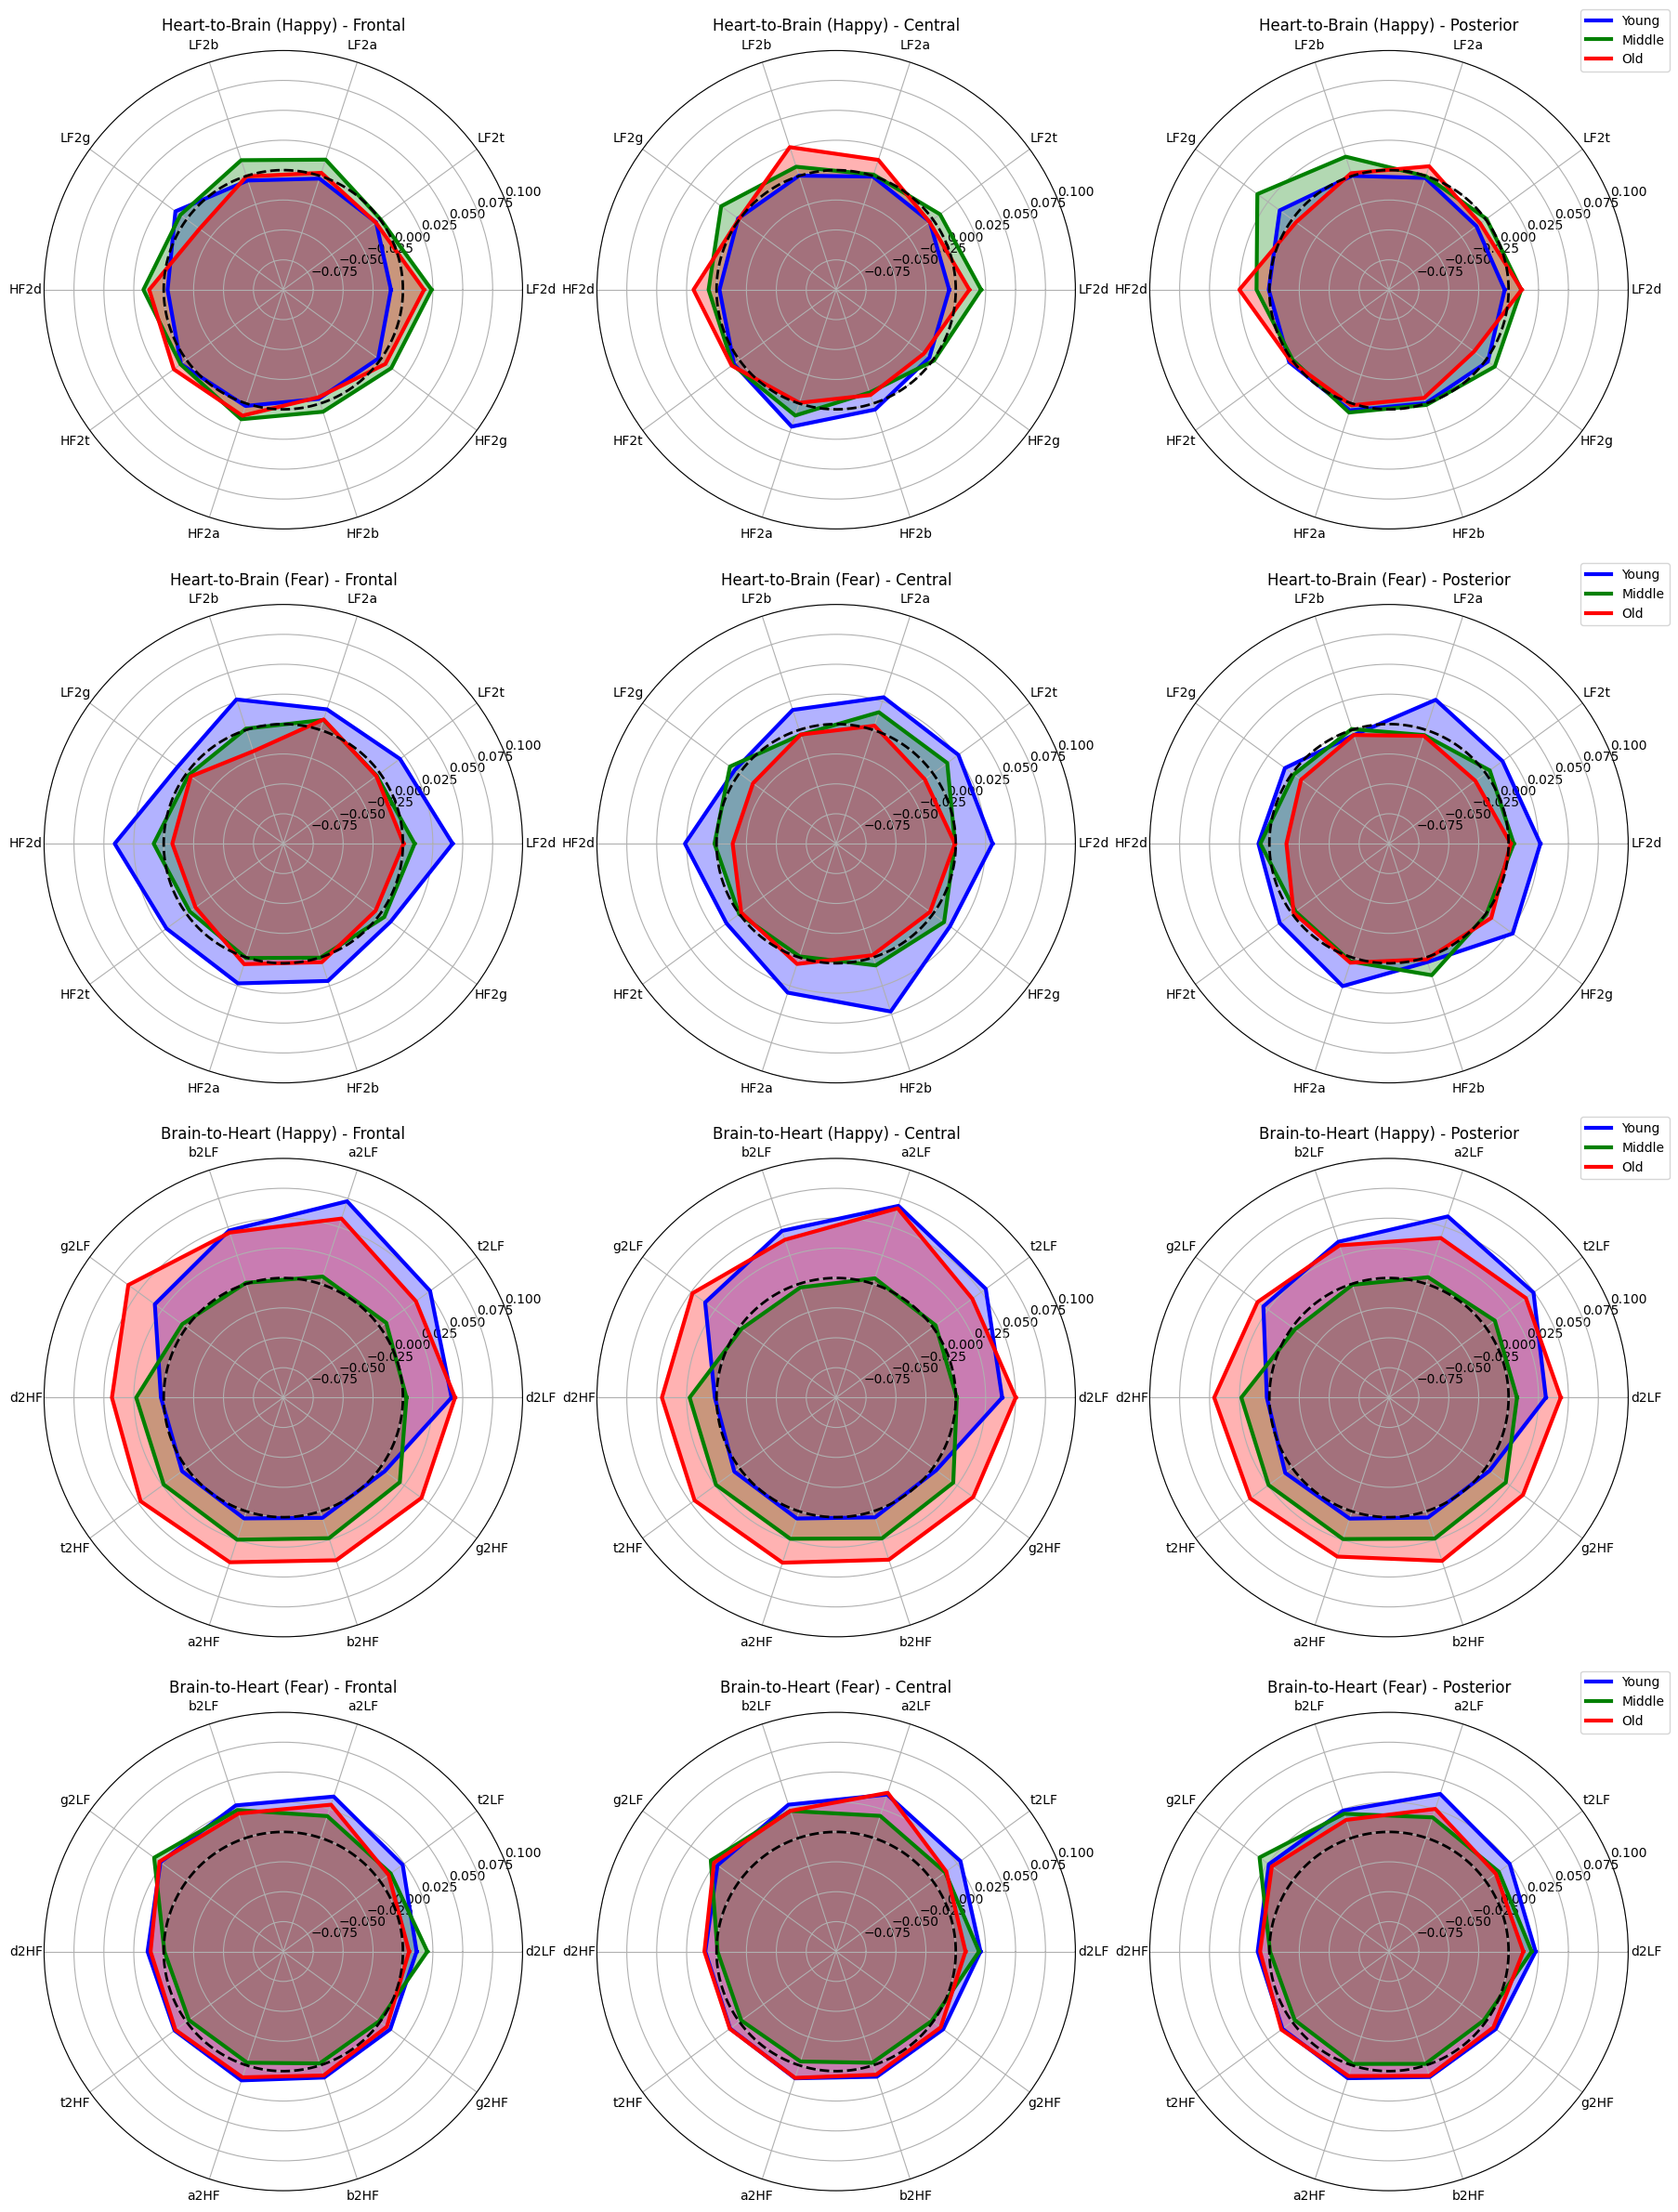

In [21]:
## plot radar charts for each age group
fig, axs = plt.subplots(4, 3, figsize=(18, 24), subplot_kw=dict(polar=True))

data_list = [
    (ISC_dH2B_Ha, 'Heart-to-Brain (Happy)', 'Ha'),
    (ISC_dH2B_Fe, 'Heart-to-Brain (Fear)', 'Fe'),
    (ISC_dB2H_Ha, 'Brain-to-Heart (Happy)', 'Ha'),
    (ISC_dB2H_Fe, 'Brain-to-Heart (Fear)', 'Fe')
]

regions = ['Frontal', 'Central', 'Posterior']
age_groups = ['young', 'middle', 'old']
colors = ['blue', 'green', 'red']

for row_idx, (data_dict, title, condition) in enumerate(data_list):
    for col_idx, region in enumerate(regions):
        ax = axs[row_idx, col_idx] 

        for group_idx, group in enumerate(age_groups):
            values = np.array([data_dict[group][idx] for idx in range(len(data_dict[group]))])

            if region == 'Frontal':
                region_values = values[0:10][index_order]
            elif region == 'Central':
                region_values = values[10:20][index_order]
            elif region == 'Posterior':
                region_values = values[20:30][index_order]
                
            num_indicators = len(region_values)
            angles = np.linspace(0, 2 * np.pi, num_indicators, endpoint=False).tolist()
            angles += angles[:1]  

            region_values = np.concatenate((region_values, [region_values[0]]))

            ax.plot(angles, region_values, linewidth=3, label=f'{group.capitalize()}', color=colors[group_idx])
            ax.fill(angles, region_values, color=colors[group_idx], alpha=0.3)

        ax.set_ylim(-0.10, 0.10)
        
        theta = np.linspace(0, 2 * np.pi, 500)
        ax.plot(theta, [0] * len(theta), color='black', linestyle='--', linewidth=2, zorder=3)  # 添加 y=0 的黑色圆圈
        
        # ax.set_yticklabels([])  
        ax.set_xticks(angles[:-1])  
        current_labels = labels['Heart-to-Brain'] if 'Heart-to-Brain' in title else labels['Brain-to-Heart']
        ax.set_xticklabels(current_labels)  
        ax.set_title(f'{title} - {region}', fontsize=12)

        if col_idx == 2:  
            ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
# save_path = '/fig/'
# file_name = f"ISC_age_group.png"
# full_path = save_path + file_name
# plt.savefig(full_path, dpi=1200, bbox_inches='tight')
plt.show()

# IS-RSA between dBHI and self-reported feelings

In [22]:
## divide the full sample into 3 group (pseudo_young:38; pseudo_middle:35; pseudo_old:29)
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

all_results = {
    'random_dB2H_Fe_isrsa_nn': [],
    'random_dB2H_Ha_isrsa_nn': [],
    'random_dH2B_Fe_isrsa_nn': [],
    'random_dH2B_Ha_isrsa_nn': []
}

Brain_to_Heart = [index for index in dBHI_index if '2LF' in index or '2HF' in index]
Heart_to_Brain = [index for index in dBHI_index if 'LF2' in index or 'HF2' in index]

n_ts_dB2H = 146    # Time series points 
n_ts_dH2B = 161 
n_indexes = 3 * len(Brain_to_Heart)  # 3 (Ftl, Ctl, Ptr)

dBHI_Fe_Ne = mat_data['dBHI_Fe_Ne'][0, 0]
dBHI_Ha_Ne = mat_data['dBHI_Ha_Ne'][0, 0]

In [23]:
## IS-RSA for Brain_to_Heart/Heart_to_Brain X Fear/Happy X young/middle/old
dB2H_Fe_isrsa_nn = {}
dB2H_Ha_isrsa_nn = {}
dH2B_Fe_isrsa_nn = {}
dH2B_Ha_isrsa_nn = {}

for group in ['young', 'middle', 'old']:
    # dB2H - Fear
    dB2H_Fe_isrsa_nn[group] = {}
    for index in range(len(dB2H_Fe_similarity_matrices[group])):
        dB2H_Fe_isrsa_nn[group][index] = dB2H_Fe_similarity_matrices[group][index].similarity(
            nn_mtx_Fe[group], metric='spearman', n_permute = 500, n_jobs = -1
        )['correlation']

    # dB2H - Happy
    dB2H_Ha_isrsa_nn[group] = {}
    for index in range(len(dB2H_Ha_similarity_matrices[group])):
        dB2H_Ha_isrsa_nn[group][index] = dB2H_Ha_similarity_matrices[group][index].similarity(
            nn_mtx_Ha[group], metric='spearman', n_permute = 500, n_jobs = -1
        )['correlation']

    # dH2B - Fear
    dH2B_Fe_isrsa_nn[group] = {}
    for index in range(len(dH2B_Fe_similarity_matrices[group])):
        dH2B_Fe_isrsa_nn[group][index] = dH2B_Fe_similarity_matrices[group][index].similarity(
            nn_mtx_Fe[group], metric='spearman', n_permute = 500, n_jobs = -1
        )['correlation']

    # dH2B - Happy
    dH2B_Ha_isrsa_nn[group] = {}
    for index in range(len(dH2B_Ha_similarity_matrices[group])):
        dH2B_Ha_isrsa_nn[group][index] = dH2B_Ha_similarity_matrices[group][index].similarity(
            nn_mtx_Ha[group], metric='spearman', n_permute = 500, n_jobs = -1
        )['correlation']

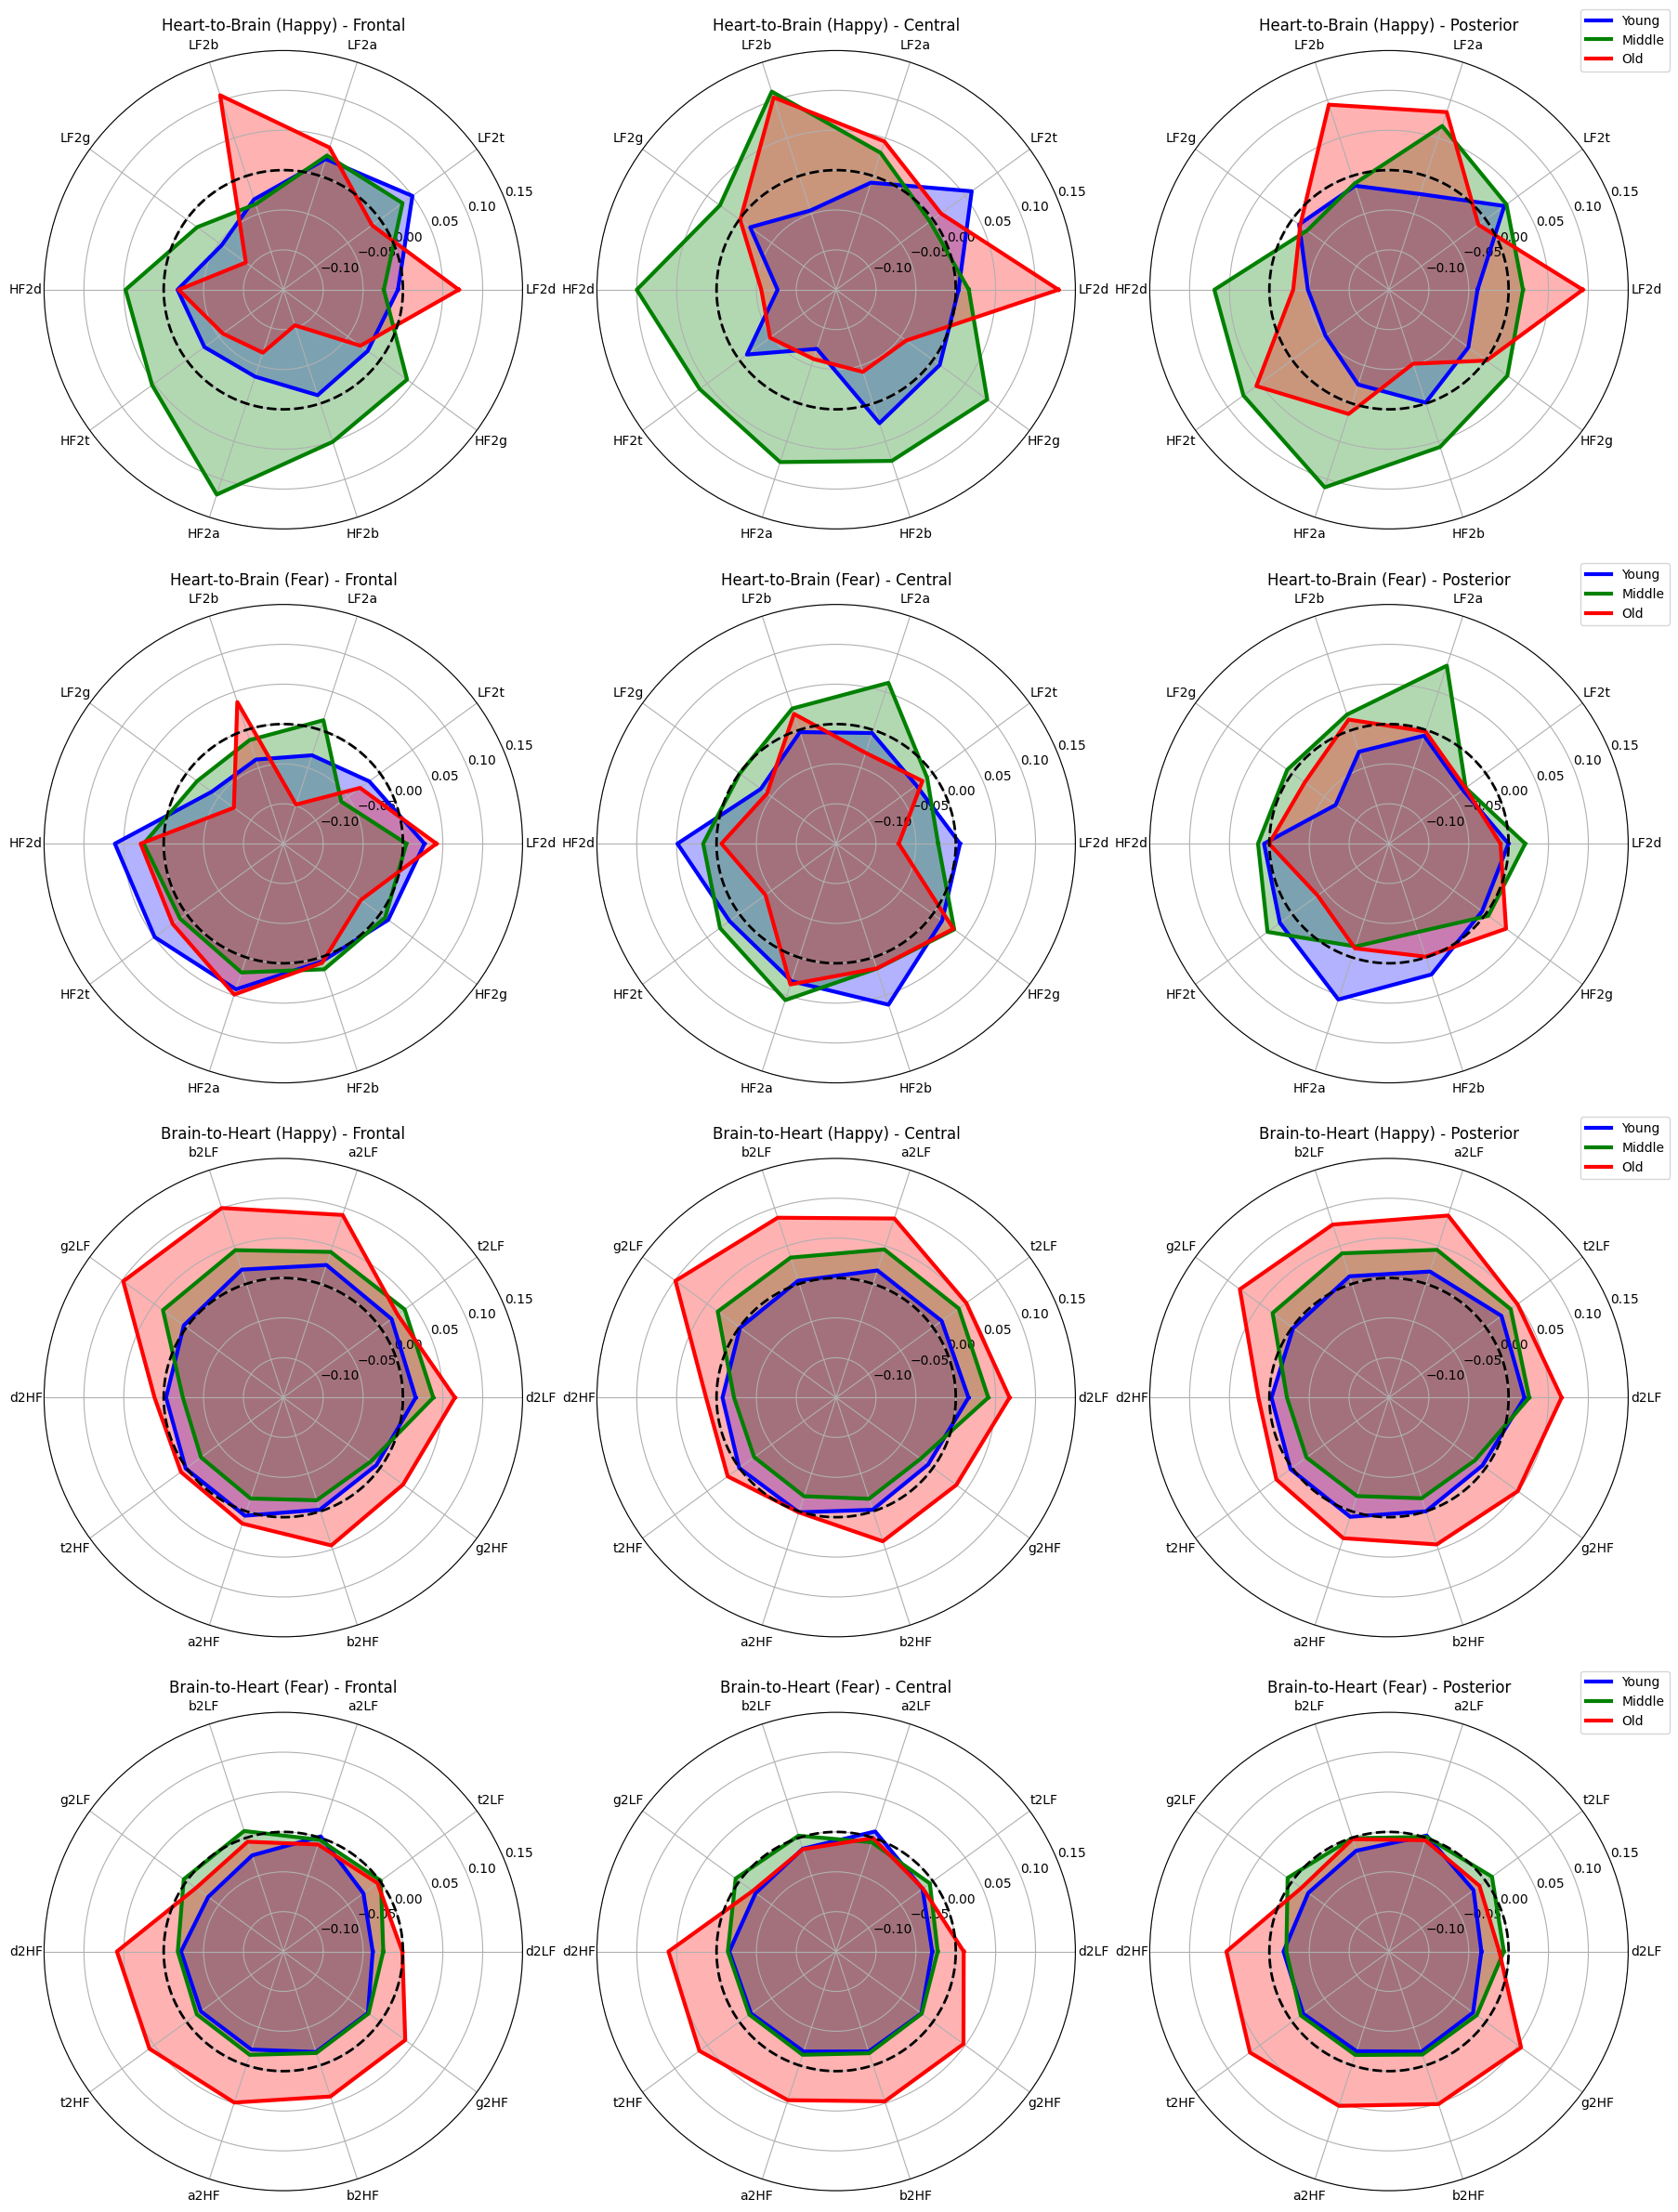

In [24]:
## plot radar charts for each age group

fig, axs = plt.subplots(4, 3, figsize=(18, 24), subplot_kw=dict(polar=True))

data_list = [
    (dH2B_Ha_isrsa_nn, 'Heart-to-Brain (Happy)', 'Ha'),
    (dH2B_Fe_isrsa_nn, 'Heart-to-Brain (Fear)', 'Fe'),
    (dB2H_Ha_isrsa_nn, 'Brain-to-Heart (Happy)', 'Ha'),
    (dB2H_Fe_isrsa_nn, 'Brain-to-Heart (Fear)', 'Fe')
]

Heart_to_Brain = [index for index in dBHI_index if 'LF2' in index or 'HF2' in index]
Brain_to_Heart = [index for index in dBHI_index if '2LF' in index or '2HF' in index]
index_order = [4, 8, 0, 2, 6, 5, 9, 1, 3, 7]
labels = {
    'Heart-to-Brain': [Heart_to_Brain[i] for i in index_order],  
    'Brain-to-Heart': [Brain_to_Heart[i] for i in index_order]  
}

regions = ['Frontal', 'Central', 'Posterior']
age_groups = ['young', 'middle', 'old']
colors = ['blue', 'green', 'red']

for row_idx, (data_dict, title, condition) in enumerate(data_list):
    for col_idx, region in enumerate(regions):
        ax = axs[row_idx, col_idx]
        for group_idx, group in enumerate(age_groups):
            values = np.array([data_dict[group][idx] for idx in range(len(data_dict[group]))])
            if region == 'Frontal':
                region_values = values[0:10][index_order]
            elif region == 'Central':
                region_values = values[10:20][index_order]
            elif region == 'Posterior':
                region_values = values[20:30][index_order]
                
            num_indicators = len(region_values)
            angles = np.linspace(0, 2 * np.pi, num_indicators, endpoint=False).tolist()
            angles += angles[:1] 
            region_values = np.concatenate((region_values, [region_values[0]]))

            ax.plot(angles, region_values, linewidth=3, label=f'{group.capitalize()}', color=colors[group_idx])
            ax.fill(angles, region_values, color=colors[group_idx], alpha=0.3)

        ax.set_ylim(-0.15, 0.15)
        theta = np.linspace(0, 2 * np.pi, 500)
        ax.plot(theta, [0] * len(theta), color='black', linestyle='--', linewidth=2, zorder=3) 

        # ax.set_yticklabels([])  
        ax.set_xticks(angles[:-1])  
        current_labels = labels['Heart-to-Brain'] if 'Heart-to-Brain' in title else labels['Brain-to-Heart']
        ax.set_xticklabels(current_labels)  
        ax.set_title(f'{title} - {region}', fontsize=12)

        if col_idx == 2:  
            ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
# save_path = '/fig/IS-RSA/'
# file_name = f"IS-RSA_age_group.png"
# full_path = save_path + file_name
# plt.savefig(full_path, dpi=1200, bbox_inches='tight')
plt.show()

### Compare IS-RSA among age groups through permutations

In [25]:
## divide the full sample into 3 group (pseudo_young:38; pseudo_middle:35; pseudo_old:29)

import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

all_results = {
    'random_dB2H_Fe_isrsa_nn': [],
    'random_dB2H_Ha_isrsa_nn': [],
    'random_dH2B_Fe_isrsa_nn': [],
    'random_dH2B_Ha_isrsa_nn': []
}

Brain_to_Heart = [index for index in dBHI_index if '2LF' in index or '2HF' in index]
Heart_to_Brain = [index for index in dBHI_index if 'LF2' in index or 'HF2' in index]

n_ts_dB2H = 146    # Time series points 
n_ts_dH2B = 161 
n_indexes = 3 * len(Brain_to_Heart)  # 3 (Ftl, Ctl, Ptr)

dBHI_Fe_Ne = mat_data['dBHI_Fe_Ne'][0, 0]
dBHI_Ha_Ne = mat_data['dBHI_Ha_Ne'][0, 0]

In [ ]:
# 1000 permuations
n_iterations = 1000

for iteration in range(n_iterations):
    random_groups = {
        'pseudo_young': info_dBHI.sample(frac=1).iloc[:38],  # select 38 children randomly
        'pseudo_middle': info_dBHI.sample(frac=1).iloc[38:73],  # select 35 children randomly
        'pseudo_old': info_dBHI.sample(frac=1).iloc[73:]  # select 29 children randomly
    }

    random_nn_mtx_Fe = {}
    random_nn_mtx_Ha = {}
    random_dB2H_Fe_similarity_matrices = {}
    random_dB2H_Ha_similarity_matrices = {}
    random_dH2B_Fe_similarity_matrices = {}
    random_dH2B_Ha_similarity_matrices = {}
    
    # -----self-reports-ISC--------
    for group_name, group_data in random_groups.items():
        n_subs = len(group_data)  
        features_Fe = group_data[['A_Fe_Ne', 'V_Fe_Ne']].values
        features_Ha = group_data[['A_Ha_Ne', 'V_Ha_Ne']].values

        random_nn_mtx_Fe[group_name] = np.zeros((n_subs, n_subs))
        random_nn_mtx_Ha[group_name] = np.zeros((n_subs, n_subs))

        for i in range(n_subs):
            for j in range(i + 1, n_subs):
                dist_ij_Fe = 1 - (np.linalg.norm(features_Fe[i] - features_Fe[j]) / n_subs)  
                dist_ij_Ha = 1 - (np.linalg.norm(features_Ha[i] - features_Ha[j]) / n_subs)
                random_nn_mtx_Fe[group_name][i, j] = dist_ij_Fe
                random_nn_mtx_Fe[group_name][j, i] = dist_ij_Fe
                random_nn_mtx_Ha[group_name][i, j] = dist_ij_Ha
                random_nn_mtx_Ha[group_name][j, i] = dist_ij_Ha

        random_nn_mtx_Fe[group_name] = (random_nn_mtx_Fe[group_name] - np.min(random_nn_mtx_Fe[group_name])) / (np.max(random_nn_mtx_Fe[group_name]) - np.min(random_nn_mtx_Fe[group_name]))
        random_nn_mtx_Ha[group_name] = (random_nn_mtx_Ha[group_name] - np.min(random_nn_mtx_Ha[group_name])) / (np.max(random_nn_mtx_Ha[group_name]) - np.min(random_nn_mtx_Ha[group_name]))

        np.fill_diagonal(random_nn_mtx_Fe[group_name], 1)
        np.fill_diagonal(random_nn_mtx_Ha[group_name], 1)
    
    # -----dBHI-ISC--------
    random_dH2B_Fe = {group: np.zeros((len(ids), n_ts_dH2B, n_indexes)) for group, ids in random_groups.items()}
    random_dH2B_Ha = {group: np.zeros((len(ids), n_ts_dH2B, n_indexes)) for group, ids in random_groups.items()}
    random_dB2H_Fe = {group: np.zeros((len(ids), n_ts_dB2H, n_indexes)) for group, ids in random_groups.items()}
    random_dB2H_Ha = {group: np.zeros((len(ids), n_ts_dB2H, n_indexes)) for group, ids in random_groups.items()}

    for idx, indicator in enumerate(Heart_to_Brain):
        for group, ids in random_groups.items():
            for i, subject_index in enumerate(ids.index):
                trial_data_ftl_fe = dBHI_Fe_Ne['Ftl'][indicator][0][0][0,subject_index]
                random_dH2B_Fe[group][i, :, idx] = trial_data_ftl_fe
                trial_data_ctl_fe = dBHI_Fe_Ne['Ctl'][indicator][0][0][0,subject_index]
                random_dH2B_Fe[group][i, :, idx + len(Heart_to_Brain)] = trial_data_ctl_fe
                trial_data_ptr_fe = dBHI_Fe_Ne['Ptr'][indicator][0][0][0,subject_index]
                random_dH2B_Fe[group][i, :, idx + 2 * len(Heart_to_Brain)] = trial_data_ptr_fe

                trial_data_ftl_ha = dBHI_Ha_Ne['Ftl'][indicator][0][0][0,subject_index]
                random_dH2B_Ha[group][i, :, idx] = trial_data_ftl_ha
                trial_data_ctl_ha = dBHI_Ha_Ne['Ctl'][indicator][0][0][0,subject_index]
                random_dH2B_Ha[group][i, :, idx + len(Heart_to_Brain)] = trial_data_ctl_ha
                trial_data_ptr_ha = dBHI_Ha_Ne['Ptr'][indicator][0][0][0,subject_index]
                random_dH2B_Ha[group][i, :, idx + 2 * len(Heart_to_Brain)] = trial_data_ptr_ha
    
    for idx, indicator in enumerate(Brain_to_Heart):
        for group, ids in random_groups.items():
            # Fe_Ne data extraction for each age group
            for i, subject_index in enumerate(ids.index):
                trial_data_ftl_fe = dBHI_Fe_Ne['Ftl'][indicator][0][0][0,subject_index]
                random_dB2H_Fe[group][i, :, idx] = trial_data_ftl_fe
                trial_data_ctl_fe = dBHI_Fe_Ne['Ctl'][indicator][0][0][0,subject_index]
                random_dB2H_Fe[group][i, :, idx + len(Brain_to_Heart)] = trial_data_ctl_fe
                trial_data_ptr_fe = dBHI_Fe_Ne['Ptr'][indicator][0][0][0,subject_index]
                random_dB2H_Fe[group][i, :, idx + 2 * len(Brain_to_Heart)] = trial_data_ptr_fe

                # Ha_Ne data extraction for each age group
                trial_data_ftl_ha = dBHI_Ha_Ne['Ftl'][indicator][0][0][0,subject_index]
                random_dB2H_Ha[group][i, :, idx] = trial_data_ftl_ha
                trial_data_ctl_ha = dBHI_Ha_Ne['Ctl'][indicator][0][0][0,subject_index]
                random_dB2H_Ha[group][i, :, idx + len(Brain_to_Heart)] = trial_data_ctl_ha
                trial_data_ptr_ha = dBHI_Ha_Ne['Ptr'][indicator][0][0][0,subject_index]
                random_dB2H_Ha[group][i, :, idx + 2 * len(Brain_to_Heart)] = trial_data_ptr_ha
    random_dB2H_Fe_similarity_matrices = {}
    random_dB2H_Ha_similarity_matrices = {}
    random_dH2B_Fe_similarity_matrices = {}
    random_dH2B_Ha_similarity_matrices = {}
    
    for group_name, group_data in random_groups.items():
        random_dB2H_Fe_similarity = []
        random_dB2H_Ha_similarity = []
        random_dH2B_Fe_similarity = []
        random_dH2B_Ha_similarity = []
        for index in range(n_indexes): 
            similarity_matrix_Fe_dH2B = Adjacency(1 - pairwise_distances(random_dH2B_Fe[group_name][:, :, index], metric='correlation'), matrix_type='similarity')
            random_dH2B_Fe_similarity.append(similarity_matrix_Fe_dH2B)
            similarity_matrix_Ha_dH2B = Adjacency(1 - pairwise_distances(random_dH2B_Ha[group_name][:, :, index], metric='correlation'), matrix_type='similarity')
            random_dH2B_Ha_similarity.append(similarity_matrix_Ha_dH2B)
            similarity_matrix_Fe_dB2H = Adjacency(1 - pairwise_distances(random_dB2H_Fe[group_name][:, :, index], metric='correlation'), matrix_type='similarity')
            random_dB2H_Fe_similarity.append(similarity_matrix_Fe_dB2H)
            similarity_matrix_Ha_dB2H = Adjacency(1 - pairwise_distances(random_dB2H_Ha[group_name][:, :, index], metric='correlation'), matrix_type='similarity')
            random_dB2H_Ha_similarity.append(similarity_matrix_Ha_dB2H)
            
        random_dB2H_Fe_similarity_matrices[group_name] = Adjacency(random_dB2H_Fe_similarity)
        random_dB2H_Ha_similarity_matrices[group_name] = Adjacency(random_dB2H_Ha_similarity)
        random_dH2B_Fe_similarity_matrices[group_name] = Adjacency(random_dH2B_Fe_similarity)
        random_dH2B_Ha_similarity_matrices[group_name] = Adjacency(random_dH2B_Ha_similarity)

    # ---- IS-RSA ----
    random_dB2H_Fe_isrsa_nn = {}
    random_dB2H_Ha_isrsa_nn = {}
    random_dH2B_Fe_isrsa_nn = {}
    random_dH2B_Ha_isrsa_nn = {}
    for group in ['pseudo_young', 'pseudo_middle', 'pseudo_old']:
        # dB2H - Fear
        random_dB2H_Fe_isrsa_nn[group] = {}
        for index in range(len(random_dB2H_Fe_similarity_matrices[group])):
            random_dB2H_Fe_isrsa_nn[group][index] = random_dB2H_Fe_similarity_matrices[group][index].similarity(
                random_nn_mtx_Fe[group], metric='spearman', n_permute=500, n_jobs=-1
            )['correlation']
        # dB2H - Happy
        random_dB2H_Ha_isrsa_nn[group] = {}
        for index in range(len(random_dB2H_Ha_similarity_matrices[group])):
            random_dB2H_Ha_isrsa_nn[group][index] = random_dB2H_Ha_similarity_matrices[group][index].similarity(
                random_nn_mtx_Ha[group], metric='spearman', n_permute=500, n_jobs=-1
            )['correlation']

        # dH2B - Fear
        random_dH2B_Fe_isrsa_nn[group] = {}
        for index in range(len(random_dH2B_Fe_similarity_matrices[group])):
            random_dH2B_Fe_isrsa_nn[group][index] = random_dH2B_Fe_similarity_matrices[group][index].similarity(
                random_nn_mtx_Fe[group], metric='spearman', n_permute=500, n_jobs=-1
            )['correlation']
        # dH2B - Happy
        random_dH2B_Ha_isrsa_nn[group] = {}
        for index in range(len(random_dH2B_Ha_similarity_matrices[group])):
            random_dH2B_Ha_isrsa_nn[group][index] = random_dH2B_Ha_similarity_matrices[group][index].similarity(
                random_nn_mtx_Ha[group], metric='spearman', n_permute=500, n_jobs=-1
            )['correlation']

    all_results['random_dB2H_Fe_isrsa_nn'].append(random_dB2H_Fe_isrsa_nn)
    all_results['random_dB2H_Ha_isrsa_nn'].append(random_dB2H_Ha_isrsa_nn)
    all_results['random_dH2B_Fe_isrsa_nn'].append(random_dH2B_Fe_isrsa_nn)
    all_results['random_dH2B_Ha_isrsa_nn'].append(random_dH2B_Ha_isrsa_nn)

In [ ]:
## save the permutations results
import json
save_path = '/similarity analysis/Boot1000_IS_RSA500_age.json'
with open(save_path, 'w') as f:
    json.dump(all_results, f)

In [26]:
## read in
import json

folder_path = '/similarity analysis'
file_path = os.path.join(folder_path, 'Boot1000_IS_RSA500_age.json')

with open(file_path, 'r') as f:
    IS_RSA_age = json.load(f)

In [33]:
import numpy as np
import pickle

analysis_type = 'dB2H'  # Change to 'dB2H' for Brain-to-Heart
emotion_type = 'Ha'  # Change to 'Ha' for Happy
# Real observed data selection 
observed_isrsa = analysis_type + '_' + emotion_type + '_isrsa_nn'
selected_isrsa_nn = globals()[observed_isrsa]

# permutations
range_distributions = {i: [] for i in range(30)}
# Generate range distributions for the 1000 random samples
for sample_idx in range(1000):
    pseudo_young = IS_RSA_age['random_' + analysis_type + '_' + emotion_type + '_isrsa_nn'][sample_idx]['pseudo_young']
    pseudo_middle = IS_RSA_age['random_' + analysis_type + '_' + emotion_type + '_isrsa_nn'][sample_idx]['pseudo_middle']
    pseudo_old = IS_RSA_age['random_' + analysis_type + '_' + emotion_type + '_isrsa_nn'][sample_idx]['pseudo_old']
    
    for idx in range(30):  
        young_value = pseudo_young[str(idx)]  
        middle_value = pseudo_middle[str(idx)]
        old_value = pseudo_old[str(idx)]
        
        # Compute the range (max - min) for each indicator
        range_value = np.ptp([young_value, middle_value, old_value]) 
        
        # Append the range value to the appropriate list in range_distributions
        range_distributions[idx].append(range_value)

# Calculate the observed range for each indicator in the real data
observed_ranges = {}
for idx in range(30):
    # Real observed values for each group (young, middle, old)
    young_value = selected_isrsa_nn['young'][idx]
    middle_value = selected_isrsa_nn['middle'][idx]
    old_value = selected_isrsa_nn['old'][idx]
    
    # Compute the observed range (max - min)
    observed_range = np.ptp([young_value, middle_value, old_value])
    observed_ranges[idx] = observed_range

# Calculate p-values for each indicator by comparing observed range with random distribution
p_values = {}
for idx in range(30):
    observed_range = observed_ranges[idx]
    random_range_distribution = range_distributions[idx]
    
    # Calculate the p-value: the proportion of random ranges greater than or equal to the observed range
    p_value = np.sum(np.array(random_range_distribution) >= observed_range) / len(random_range_distribution)
    p_values[idx] = p_value

from statsmodels.stats.multitest import multipletests
# Benjamini-Hochberg (FDR) correction
fdr_corrected_results = multipletests(list(p_values.values()), alpha=0.05, method='fdr_bh')
fdr_p_values = {idx: corrected_p for idx, corrected_p in zip(p_values.keys(), fdr_corrected_results[1])}

# Print the FDR corrected p-values
print("\nBenjamini-Hochberg (FDR) Corrected p-values:")
for idx, corrected_p in fdr_p_values.items():
    print(f"{corrected_p}")


Benjamini-Hochberg (FDR) Corrected p-values:
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
0.952
